In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Indicaciones
#### crear un dataframe de 200 filas con las columnas: tipos_sujetos, generos, condicion, region, neurotransmisor
#### estas columnas deben tener una distribución uniforme.
#### Agregar una columna llamada "precisión" que tenga una distribución normal con mu = 0.92 y sigma = 0.08
#### Este dataset pretende simular los resultados de un estudio en el que se miden variables cognitivas y fisiológicas en diferentes regiones cerebrales, sujetos y condiciones experimentales.
#### generar un histograma de cuantos datos por sujeto se tienen
#### mostrar en un histograma la proporción de neurotransmisor

In [7]:


tipos_sujetos= ['S'+str(i).zfill(2) for i in range(4)]
generos=['M','F']
condicion=['control','experimental']
region=['hipocampo','cortex prefrontal','amigdala']
neurotransmisor=['dopamina','serotonina']

mu=0.92
sigma=0.08
precision= np.random.normal(mu,sigma,200)
enteros=np.random.randint(0,4,size=200)
sujetos=['S'+str(i).zfill(2) for i in enteros]

ops_sujetos= np.random.randint(len(tipos_sujetos),size=200)
sujetos2=[tipos_sujetos[i] for i in ops_sujetos]
ops_gens=np.random.randint(len(generos),size=200)
lista_generos=[generos[i] for i in ops_gens]
ops_condicion=np.random.randint(len(condicion),size=200)
lista_condicion=[condicion[i] for i in ops_condicion]

ops_region=np.random.randint(len(region),size=200)
lista_region=[region[i] for i in ops_region]

ops_nt=np.random.randint(len(neurotransmisor),size=200)
lista_nt=[neurotransmisor[i] for i in ops_nt]


df=pd.DataFrame({
    'Sujetos': sujetos2,
    'Género': lista_generos,
    'Condición': lista_condicion,
    'Región': lista_region,
    'Neurotransmisor': lista_nt
})
df['precision']=precision

df


,Sujetos,Género,Condición,Región,Neurotransmisor,precision
0,S00,M,experimental,amigdala,serotonina,0.817360
1,S03,F,experimental,hipocampo,serotonina,0.743314
2,S00,F,control,cortex prefrontal,serotonina,0.898709
3,S02,F,control,cortex prefrontal,serotonina,0.956579
4,S02,M,experimental,amigdala,serotonina,0.978326
...,...,...,...,...,...,...
195,S02,F,experimental,amigdala,dopamina,0.976339
196,S00,M,control,hipocampo,dopamina,1.087089
197,S00,F,control,cortex prefrontal,dopamina,1.011039
198,S01,M,experimental,amigdala,serotonina,0.862599


In [63]:
# para cada sujeto, sacar la proporción del tipo de condición
#para cada sujeto, calcular el maximo, el minimo y la media de su precisión
# para cada condición, hacer histograma de las regiones aactivadas(helados)
#hacerlo por filtrado de dataframes y usando groupby
df_por_sujetoC=df.groupby(by=['Sujetos'])['Condición']
df_por_sujeto.describe()


precision                                          \
                         count      mean       std       min       25%   
Sujetos Condición                                                        
S00     control           25.0  0.941913  0.082764  0.762846  0.898709   
        experimental      27.0  0.918380  0.063802  0.788456  0.875666   
S01     control           27.0  0.913486  0.082075  0.731201  0.866971   
        experimental      24.0  0.910866  0.085376  0.657900  0.872413   
S02     control           26.0  0.899205  0.065109  0.737932  0.879703   
        experimental      23.0  0.926480  0.067310  0.768705  0.871710   
S03     control           27.0  0.934294  0.071600  0.802091  0.888479   
        experimental      21.0  0.914668  0.085202  0.743314  0.846738   

                                                    
                           50%       75%       max  
Sujetos Condición                                   
S00     control       0.942234  0.989248  1.101681  
        experimental  0.920879  0.963744  1.042758  
S01     control       0.907789  0.967561  1.088084  
        experimental  0.908412  0.963260  1.054482  
S02     control       0.918725  0.930456  1.022448  
        experimental  0.933924  0.976229  1.053316  
S03     control       0.921296  0.974836  1.089711  
        experimental  0.919283  0.981090  1.063501

In [52]:
df_por_sujetoP=df.groupby(by='Sujetos')['precision']
df_por_sujetoP.describe()

,count,mean,std,min,25%,50%,75%,max
Sujetos,,,,,,,,
S00,52.0,0.929694,0.073754,0.762846,0.883104,0.935733,0.971043,1.101681
S01,51.0,0.912253,0.082810,0.657900,0.866971,0.907799,0.965128,1.088084
S02,49.0,0.912007,0.066885,0.737932,0.874798,0.923401,0.953956,1.053316
S03,48.0,0.925708,0.077601,0.743314,0.870939,0.920289,0.980445,1.089711


In [58]:
suj0=df[df['Sujetos']=='S00'].Condición
suj1=df[df['Sujetos']=='S01'].Condición
suj2=df[df['Sujetos']=='S02'].Condición
suj3=df[df['Sujetos']=='S03'].Condición

print('Sujeto 0:',suj0.value_counts('Condición'),'Sujeto 1:',suj1.value_counts('Condición'),'Sujeto2:',suj2.value_counts('Condición'),'Sujeto 3:',suj3.value_counts('Condición'))

Sujeto 0: Condición
experimental    0.519231
control         0.480769
Name: proportion, dtype: float64 Sujeto 1: Condición
control         0.529412
experimental    0.470588
Name: proportion, dtype: float64 Sujeto2: Condición
control         0.530612
experimental    0.469388
Name: proportion, dtype: float64 Sujeto 3: Condición
control         0.5625
experimental    0.4375
Name: proportion, dtype: float64


In [61]:
suj0=df[df['Sujetos']=='S00'].precision
suj1=df[df['Sujetos']=='S01'].precision
suj2=df[df['Sujetos']=='S02'].precision
suj3=df[df['Sujetos']=='S03'].precision

print('Sujeto 0:',suj0.describe().loc[['mean','min','max']] ,
      'Sujeto 1:',suj1.describe().loc[['mean','min','max']],
      'Sujeto2:',suj2.describe().loc[['mean','min','max']],
      'Sujeto 3:',suj3.describe().loc[['mean','min','max']])





Sujeto 0: mean    0.929694
min     0.762846
max     1.101681
Name: precision, dtype: float64 Sujeto 1: mean    0.912253
min     0.657900
max     1.088084
Name: precision, dtype: float64 Sujeto2: mean    0.912007
min     0.737932
max     1.053316
Name: precision, dtype: float64 Sujeto 3: mean    0.925708
min     0.743314
max     1.089711
Name: precision, dtype: float64


In [35]:
experimento ={
    'sujeto':['S01','S02','S03','S02','S01','S01','S02'],
    'sabor':['choco','piñon','queso','chango','choco','queso','angel'],
    'precio':[45,105,30,60,85,45,120],
    'tamaño':['m','g','ch','ch','g','m','g']
}
experimento

{'sujeto': ['S01', 'S02', 'S03', 'S02', 'S01', 'S01', 'S02'],
 'sabor': ['choco', 'piñon', 'queso', 'chango', 'choco', 'queso', 'angel'],
 'precio': [45, 105, 30, 60, 85, 45, 120],
 'tamaño': ['m', 'g', 'ch', 'ch', 'g', 'm', 'g']}

In [38]:
helados=pd.DataFrame(experimento)
helados['activación']= [True, True, False, False, True, True, False]
helados

,sujeto,sabor,precio,tamaño,activación
0,S01,choco,45,m,True
1,S02,piñon,105,g,True
2,S03,queso,30,ch,False
3,S02,chango,60,ch,False
4,S01,choco,85,g,True
5,S01,queso,45,m,True
6,S02,angel,120,g,False


(array([2., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([ 45.,  51.,  57.,  63.,  69.,  75.,  81.,  87.,  93.,  99., 105.]),
 <BarContainer object of 10 artists>)

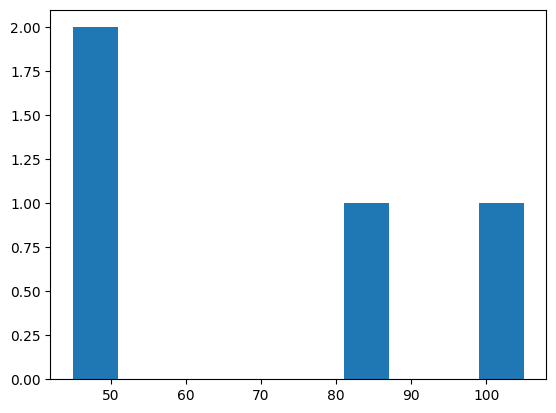

In [45]:
plt.hist(helados.loc[helados['activación'], 'precio'])

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

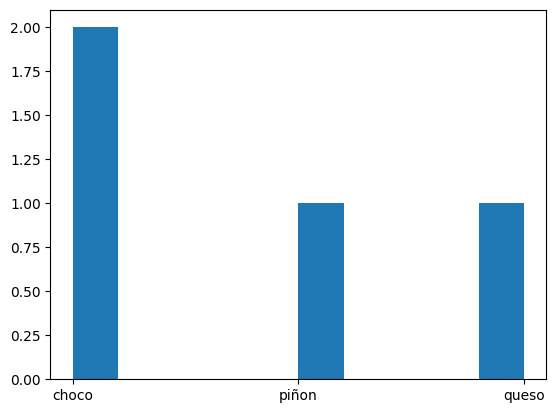

In [46]:
plt.hist(helados.loc[helados['activación'], 'sabor'])

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

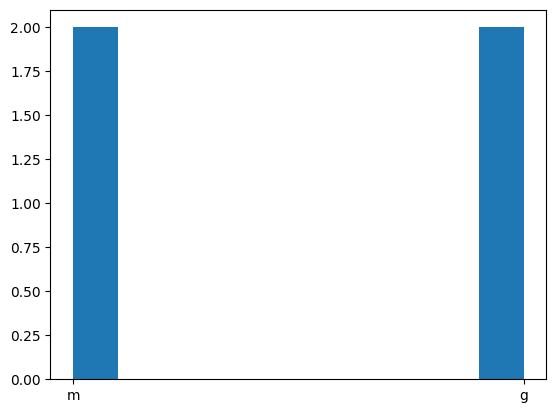

In [47]:
plt.hist(helados.loc[helados['activación'], 'tamaño'])